# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities

['ushuaia',
 'parkes',
 'korgen',
 'bambous virieux',
 'gbarnga',
 'qaanaaq',
 'bucak',
 'albany',
 'punta arenas',
 'peniche',
 'atuona',
 'vaini',
 'puerto ayora',
 'buraydah',
 'bredasdorp',
 'olinda',
 'mataura',
 'tiksi',
 'paamiut',
 'airai',
 'xiaoweizhai',
 'cajabamba',
 'georgetown',
 'abonnema',
 'jiuquan',
 'chokurdakh',
 'new norfolk',
 'rikitea',
 'erken-shakhar',
 'port alfred',
 'belushya guba',
 'codrington',
 'santa marta',
 'la asuncion',
 'silver city',
 'kapaa',
 'haines junction',
 'sitka',
 'gornopravdinsk',
 'busselton',
 'fairbanks',
 'samusu',
 'khonsar',
 'souillac',
 'shelburne',
 'geraldton',
 'morondava',
 'victoria',
 'naze',
 'ciras',
 'coihaique',
 'mahebourg',
 'alamosa',
 'arraial do cabo',
 'iqaluit',
 'sao filipe',
 'kamenka',
 'conceicao do araguaia',
 'kaeo',
 'santa cruz',
 'pombas',
 'kodiak',
 'castro',
 'dingle',
 'attawapiskat',
 'cherskiy',
 'tarare',
 'filadelfia',
 'nikolskoye',
 'saint-pierre',
 'esperance',
 'nuuk',
 'san francisco',
 'um

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
i = 0
columns = ['City latitude','City longitude','Max temperature',
   'Humidity','Cloud coverage','Wind speed',
   'City country', 'City', # though not in the rubric. Seems required for part 2?
   'City datetime'
]
rows = []

positions = list(citipy.WORLD_CITIES_DICT.keys())
sample = np.random.random_integers(0, len(positions),600)

for x in sample:
    pos = positions[x]
    city = citipy.WORLD_CITIES_DICT[pos]

    link = "https://api.openweathermap.org/data/2.5/weather?lat={0}&lon={1}&appid={2}".format(pos[0], pos[1], weather_api_key)
    #print(link)
    print(i, city.city_name)
    resp = requests.get(link)
    data = resp.json()
    try :
      rows.append( [pos[0], pos[1], data['main']['temp_max'],
               data['main']['humidity'], data['clouds']['all'], data['wind']['speed'],
               data['sys']['country'], city.city_name, data['dt']] )
    except KeyError:
       pass 
    if i == 800:
       break
    i += 1

df = pd.DataFrame(rows, columns = columns);    

C:\Users\lshrn\AppData\Local\Temp/ipykernel_15660/4181160224.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 46723 + 1) instead
  sample = np.random.random_integers(0, len(positions),600)


0 rodbyhavn
1 texistepeque
2 hammelburg
3 yala
4 canhandugan
5 glad
6 sapang
7 kardla
8 komnina
9 huai thalaeng
10 birsfelden
11 pirgos
12 san martin
13 yamasaki
14 jaguariaiva
15 racoviteni
16 jacksonville
17 teofilo otoni
18 popesti
19 nazareno
20 belluru
21 tagana-an
22 tigri
23 tres coracoes
24 chaupimarca
25 ceara-mirim
26 alamor
27 baringo
28 kendallville
29 bedesa
30 san carlos
31 agartala
32 goderich
33 penzberg
34 surovikino
35 huilong
36 mill creek
37 el espinal
38 schonaich
39 kosjeric
40 tulsa
41 soltvadkert
42 arcachon
43 plaeng yao
44 lamont
45 san marcos
46 stoicanesti
47 new kensington
48 cabrobo
49 mochalishche
50 saltillo
51 caucaia
52 gummersbach
53 loudon
54 likhoslavl
55 trois-rivieres
56 nova odesa
57 leglise
58 sambulawan
59 farrukhnagar
60 krapkowice
61 sedro-woolley
62 kotri
63 madison
64 am timan
65 yenotayevka
66 pallipattu
67 ripky
68 sainte-anne-des-monts
69 chatham
70 siddharthanagar
71 dansuli
72 rafiganj
73 pailles
74 cootamundra
75 holly springs
76 conc

In [5]:
#Dependencies
import json



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df.to_csv("weather.csv", index=False)

In [7]:
df

,City latitude,City longitude,Max temperature,Humidity,Cloud coverage,Wind speed,City country,City,City datetime
0,54.654424,11.352033,280.43,72,58,3.94,DK,rodbyhavn,1651351603
1,14.133333,-89.500000,306.80,54,40,1.03,SV,texistepeque,1651351604
2,50.116667,9.900000,283.06,95,100,1.97,DE,hammelburg,1651351605
3,6.539946,101.281284,300.42,93,100,1.38,TH,yala,1651351605
4,11.135000,124.779722,295.98,95,100,0.97,PH,canhandugan,1651351606
...,...,...,...,...,...,...,...,...,...
595,11.750000,79.750000,302.16,81,17,5.65,IN,gudalur,1651352024
596,11.638700,122.334100,297.02,99,97,2.51,PH,banga,1651352025
597,19.533333,84.883333,298.90,92,6,2.19,IN,purushottampur,1651352026
598,45.216667,27.433333,284.31,68,48,0.83,RO,sutesti,1651352026


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
df[df['Humidity'] > 100]

,City latitude,City longitude,Max temperature,Humidity,Cloud coverage,Wind speed,City country,City,City datetime


In [9]:
#  Get the indices of cities that have humidity over 100%.
df[df['Humidity'] > 100].index

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
df = df[df['Humidity'] <= 100]

In [11]:

df

,City latitude,City longitude,Max temperature,Humidity,Cloud coverage,Wind speed,City country,City,City datetime
0,54.654424,11.352033,280.43,72,58,3.94,DK,rodbyhavn,1651351603
1,14.133333,-89.500000,306.80,54,40,1.03,SV,texistepeque,1651351604
2,50.116667,9.900000,283.06,95,100,1.97,DE,hammelburg,1651351605
3,6.539946,101.281284,300.42,93,100,1.38,TH,yala,1651351605
4,11.135000,124.779722,295.98,95,100,0.97,PH,canhandugan,1651351606
...,...,...,...,...,...,...,...,...,...
595,11.750000,79.750000,302.16,81,17,5.65,IN,gudalur,1651352024
596,11.638700,122.334100,297.02,99,97,2.51,PH,banga,1651352025
597,19.533333,84.883333,298.90,92,6,2.19,IN,purushottampur,1651352026
598,45.216667,27.433333,284.31,68,48,0.83,RO,sutesti,1651352026


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

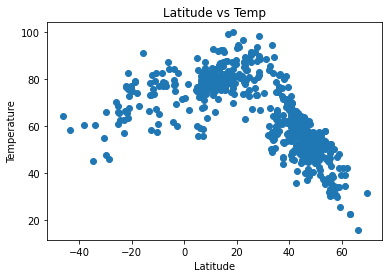

In [12]:
fahrenheit = (df['Max temperature'] - 273.15) * 9 /5  + 32
plt.scatter(df['City latitude'], fahrenheit)
plt.title('Latitude vs Temp')
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("LatvsTemp.png")

## Latitude vs. Humidity Plot

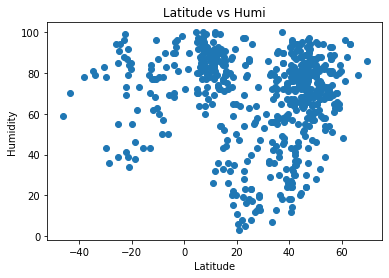

In [13]:
plt.scatter(df['City latitude'], df['Humidity'])
plt.title('Latitude vs Humi')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("LatvsHumi.png")

## Latitude vs. Cloudiness Plot

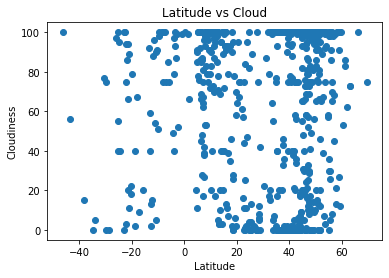

In [14]:

plt.scatter(df['City latitude'], df['Cloud coverage'])
plt.title('Latitude vs Cloud')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("LatvsCloud.png")

## Latitude vs. Wind Speed Plot

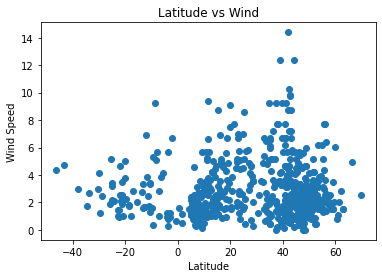

In [15]:

plt.scatter(df['City latitude'], df['Wind speed'])
plt.title('Latitude vs Wind')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("LatvsWind.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

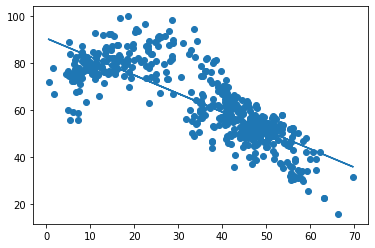

In [16]:
north = df[df['City latitude'] > 0]
fahrenheit = (north['Max temperature'] - 273.15) * 9 /5  + 32
slope, intercept, r, p, se = linregress(north['City latitude'], fahrenheit)
pred = north['City latitude'] * slope + intercept;
plt.scatter(north['City latitude'], fahrenheit)
plt.plot(north['City latitude'], pred)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

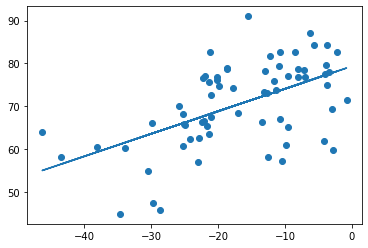

In [17]:
south = df[df['City latitude'] < 0]
fahrenheit = (south['Max temperature'] - 273.15) * 9 /5  + 32
slope, intercept, r, p, se = linregress(south['City latitude'], fahrenheit)
pred = south['City latitude'] * slope + intercept;
plt.scatter(south['City latitude'], fahrenheit)
plt.plot(south['City latitude'], pred)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

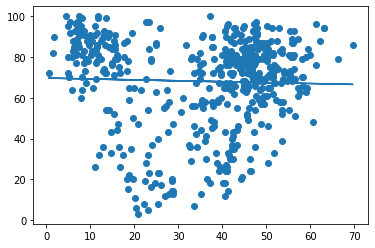

In [18]:
north = df[df['City latitude'] > 0]
slope, intercept, r, p, se = linregress(north['City latitude'], north['Humidity'])
pred = north['City latitude'] * slope + intercept;
plt.scatter(north['City latitude'], north['Humidity'])
plt.plot(north['City latitude'], pred)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

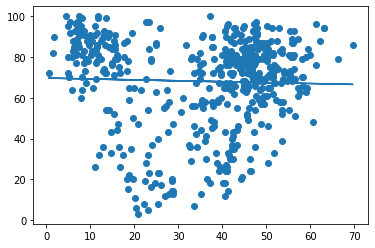

In [19]:
south = df[df['City latitude'] > 0]
slope, intercept, r, p, se = linregress(south['City latitude'], south['Humidity'])
pred = south['City latitude'] * slope + intercept;
plt.scatter(south['City latitude'], south['Humidity'])
plt.plot(south['City latitude'], pred)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

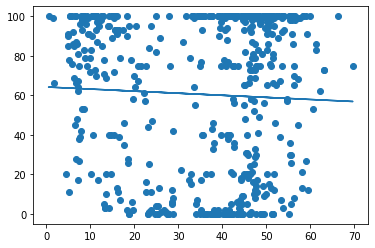

In [20]:
north = df[df['City latitude'] > 0]
slope, intercept, r, p, se = linregress(north['City latitude'], north['Cloud coverage'])
pred = north['City latitude'] * slope + intercept;
plt.scatter(north['City latitude'], north['Cloud coverage'])
plt.plot(north['City latitude'], pred)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

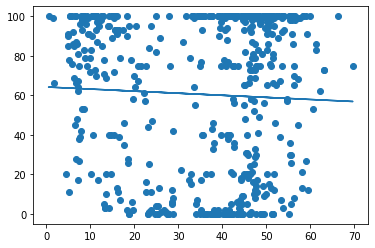

In [21]:
south = df[df['City latitude'] > 0]
slope, intercept, r, p, se = linregress(south['City latitude'], south['Cloud coverage'])
pred = south['City latitude'] * slope + intercept;
plt.scatter(north['City latitude'], south['Cloud coverage'])
plt.plot(south['City latitude'], pred)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

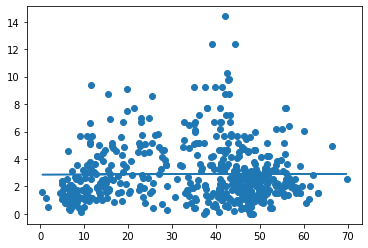

In [22]:
north = df[df['City latitude'] > 0]
slope, intercept, r, p, se = linregress(north['City latitude'], north['Wind speed'])
pred = north['City latitude'] * slope + intercept
plt.scatter(north['City latitude'], north['Wind speed'])
plt.plot(north['City latitude'], pred)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

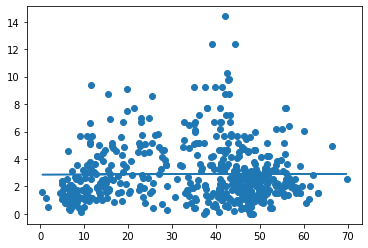

In [23]:
south = df[df['City latitude'] > 0]
slope, intercept, r, p, se = linregress(south['City latitude'], south['Wind speed'])
pred = south['City latitude'] * slope + intercept
plt.scatter(south['City latitude'], south['Wind speed'])
plt.plot(south['City latitude'], pred)